In [3]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
# If you've downloaded it from Kaggle, update the path accordingly
df = pd.read_csv("/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/submissions/team-members/Vijai/adult.csv")

# Step 3: View basic info
print("🔹 Shape of the dataset:", df.shape)
df.head()

🔹 Shape of the dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
import numpy as np
df['workclass'] = df['workclass'].replace('?', np.nan)

In [13]:
df[df['workclass'].isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,NaN,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,NaN,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,NaN,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,NaN,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,NaN,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,NaN,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,NaN,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
df.shape[0]

32561

In [15]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [16]:
df[df['workclass'].isnull() & df['occupation'].isnull()].shape[0]

1836

In [17]:
df_cleaned = df.dropna(subset=['workclass', 'occupation'])

In [32]:
(df_cleaned == ).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [21]:
df_cleaned.shape

(30718, 15)

In [24]:
df['native.country'] = df['native.country'].replace('?', np.nan)

In [35]:
df[df['native.country'].isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,NaN,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [37]:
df_cleaned = df.dropna(subset=['workclass', 'occupation', 'native.country'])

In [38]:
df_cleaned.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [39]:
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"\n📊 {col} - Value Counts (%):")
    display(df_cleaned[col].value_counts(normalize=True) * 100)


📊 workclass - Value Counts (%):


workclass
Private             73.887673
Self-emp-not-inc     8.285260
Local-gov            6.852994
State-gov            4.240435
Self-emp-inc         3.560772
Federal-gov          3.126451
Without-pay          0.046416
Name: proportion, dtype: float64


📊 education - Value Counts (%):


education
HS-grad         32.623831
Some-college    22.140442
Bachelors       16.723029
Masters          5.394205
Assoc-voc        4.333267
11th             3.474571
Assoc-acdm       3.341953
10th             2.718653
7th-8th          1.846695
Prof-school      1.796963
9th              1.508521
12th             1.249917
Doctorate        1.243286
5th-6th          0.954844
1st-4th          0.500630
Preschool        0.149194
Name: proportion, dtype: float64


📊 marital.status - Value Counts (%):


marital.status
Married-civ-spouse       46.631523
Never-married            32.245872
Divorced                 13.971222
Separated                 3.113189
Widowed                   2.741861
Married-spouse-absent     1.226709
Married-AF-spouse         0.069624
Name: proportion, dtype: float64


📊 occupation - Value Counts (%):


occupation
Prof-specialty       13.387706
Craft-repair         13.361183
Exec-managerial      13.235197
Adm-clerical         12.336715
Sales                11.882501
Other-service        10.649161
Machine-op-inspct     6.518135
Transport-moving      5.211856
Handlers-cleaners     4.475831
Farming-fishing       3.278960
Tech-support          3.023672
Protective-serv       2.135137
Priv-house-serv       0.474106
Armed-Forces          0.029839
Name: proportion, dtype: float64


📊 relationship - Value Counts (%):


relationship
Husband           41.320204
Not-in-family     25.615012
Own-child         14.806710
Unmarried         10.649161
Wife               4.661495
Other-relative     2.947417
Name: proportion, dtype: float64


📊 race - Value Counts (%):


race
White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: proportion, dtype: float64


📊 sex - Value Counts (%):


sex
Male      67.568464
Female    32.431536
Name: proportion, dtype: float64


📊 native.country - Value Counts (%):


native.country
United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
El-Salvador                    0.331543
India                          0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
Italy                          0.225449
China                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Iran                           0.139248
Taiwan                         0.139248
Haiti                          0.139248
Portugal                       0.112725
Nicaragua                


📊 income - Value Counts (%):


income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64


📊 workclass - Value Counts (%):


workclass
Private             73.887673
Self-emp-not-inc     8.285260
Local-gov            6.852994
State-gov            4.240435
Self-emp-inc         3.560772
Federal-gov          3.126451
Without-pay          0.046416
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


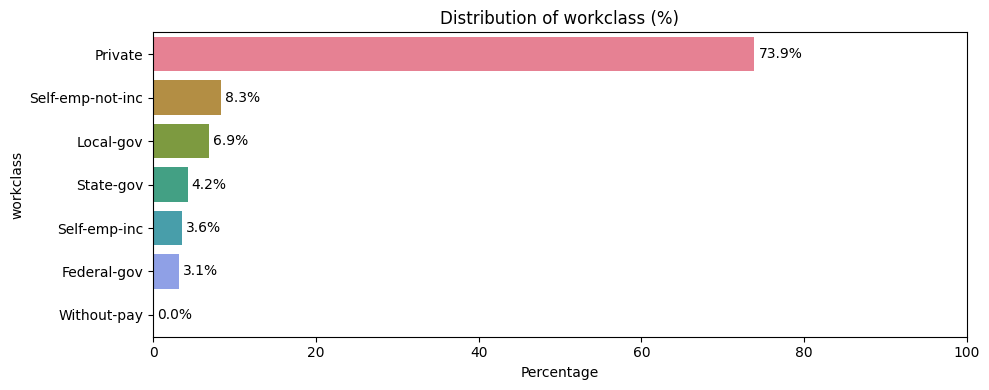


📊 education - Value Counts (%):


education
HS-grad         32.623831
Some-college    22.140442
Bachelors       16.723029
Masters          5.394205
Assoc-voc        4.333267
11th             3.474571
Assoc-acdm       3.341953
10th             2.718653
7th-8th          1.846695
Prof-school      1.796963
9th              1.508521
12th             1.249917
Doctorate        1.243286
5th-6th          0.954844
1st-4th          0.500630
Preschool        0.149194
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


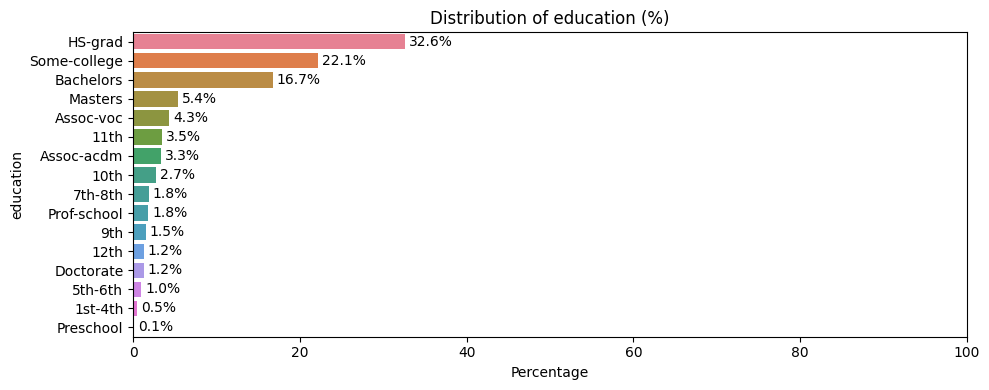


📊 marital.status - Value Counts (%):


marital.status
Married-civ-spouse       46.631523
Never-married            32.245872
Divorced                 13.971222
Separated                 3.113189
Widowed                   2.741861
Married-spouse-absent     1.226709
Married-AF-spouse         0.069624
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


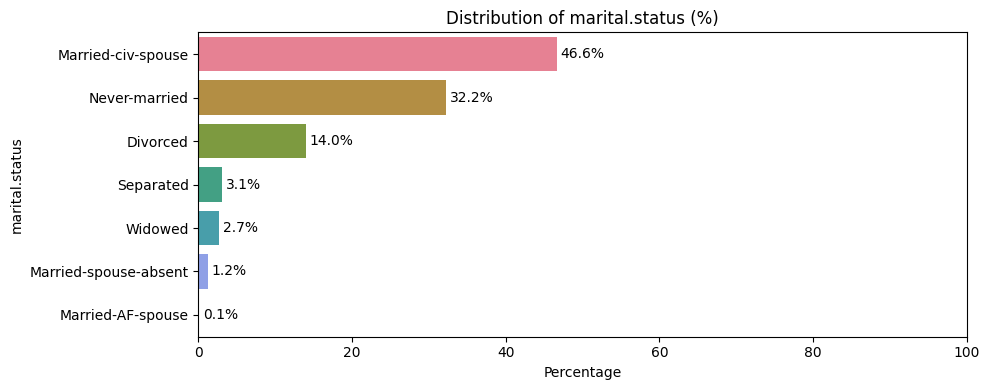


📊 occupation - Value Counts (%):


occupation
Prof-specialty       13.387706
Craft-repair         13.361183
Exec-managerial      13.235197
Adm-clerical         12.336715
Sales                11.882501
Other-service        10.649161
Machine-op-inspct     6.518135
Transport-moving      5.211856
Handlers-cleaners     4.475831
Farming-fishing       3.278960
Tech-support          3.023672
Protective-serv       2.135137
Priv-house-serv       0.474106
Armed-Forces          0.029839
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


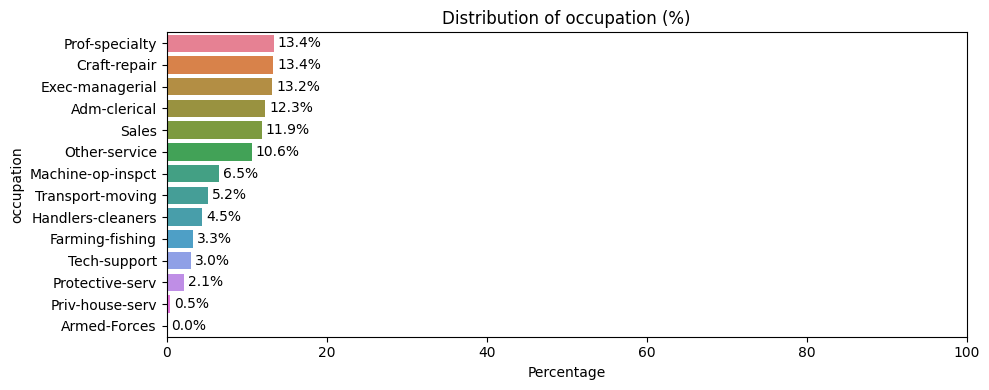


📊 relationship - Value Counts (%):


relationship
Husband           41.320204
Not-in-family     25.615012
Own-child         14.806710
Unmarried         10.649161
Wife               4.661495
Other-relative     2.947417
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


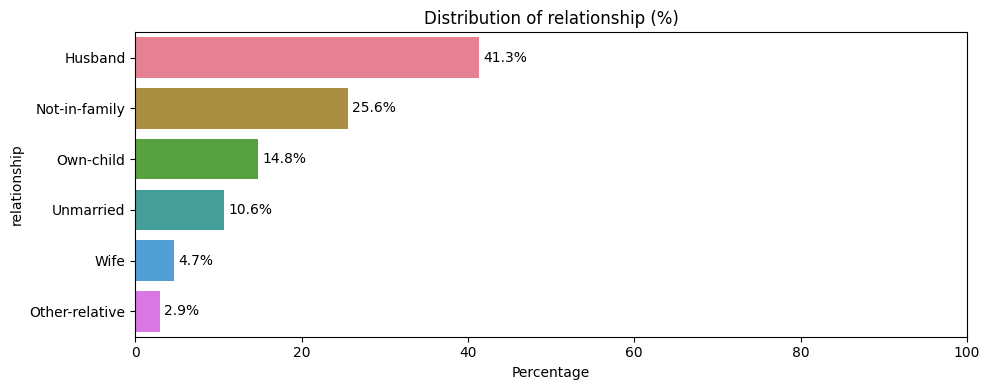


📊 race - Value Counts (%):


race
White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


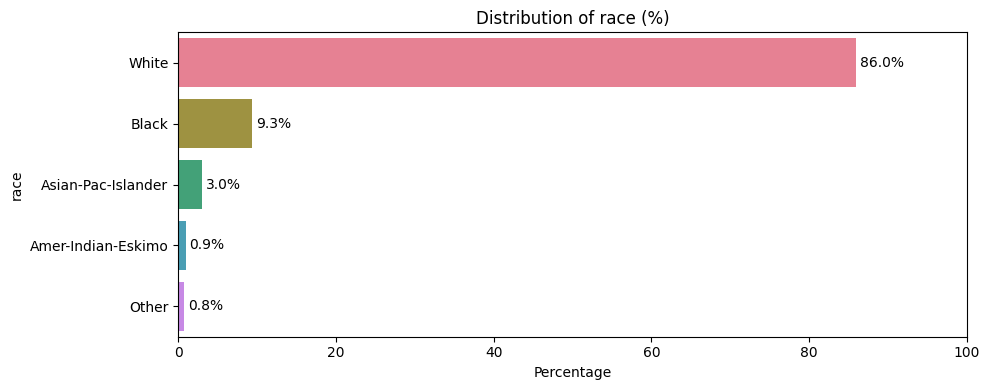


📊 sex - Value Counts (%):


sex
Male      67.568464
Female    32.431536
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


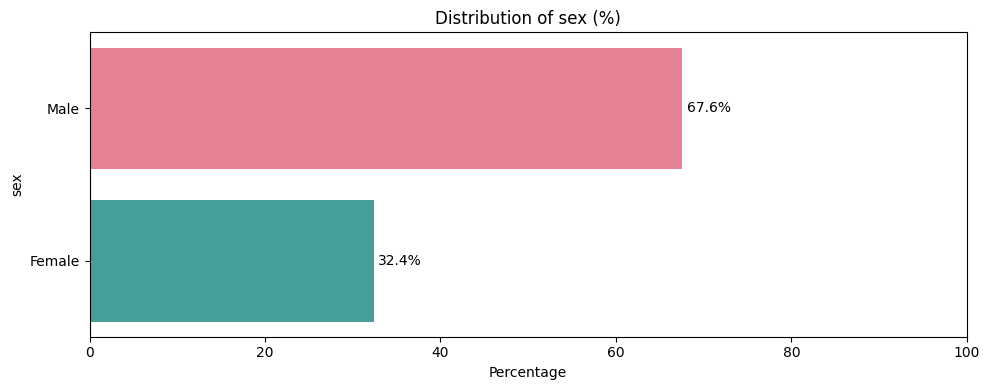


📊 native.country - Value Counts (%):


native.country
United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
El-Salvador                    0.331543
India                          0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
Italy                          0.225449
China                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Iran                           0.139248
Taiwan                         0.139248
Haiti                          0.139248
Portugal                       0.112725
Nicaragua                

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


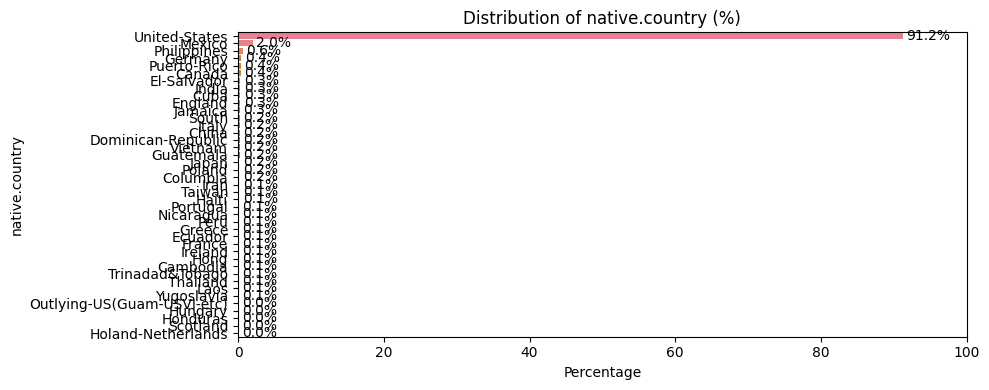


📊 income - Value Counts (%):


income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_91773/4048859246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')


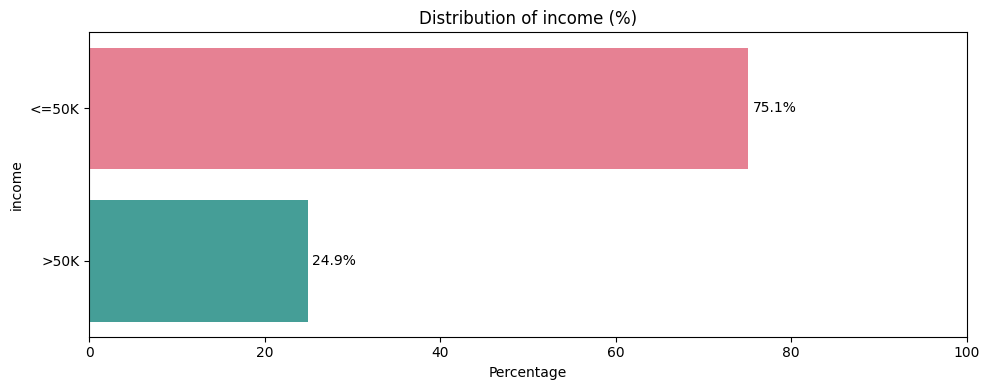

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting
%matplotlib inline

# Get categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# Iterate through each categorical column
for col in cat_cols:
    print(f"\n📊 {col} - Value Counts (%):")
    value_counts = df_cleaned[col].value_counts(normalize=True) * 100
    display(value_counts)

    # Plot bar chart
    plt.figure(figsize=(10, 4))
    sns.barplot(x=value_counts.values, y=value_counts.index, palette='husl')
    plt.title(f"Distribution of {col} (%)")
    plt.xlabel('Percentage')
    plt.ylabel(col)
    plt.xlim(0, 100)

    # Add value labels on the right side of the bars
    for i, v in enumerate(value_counts.values):
        plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

    plt.tight_layout()
    plt.show()

📈 age - Skewness: 0.53


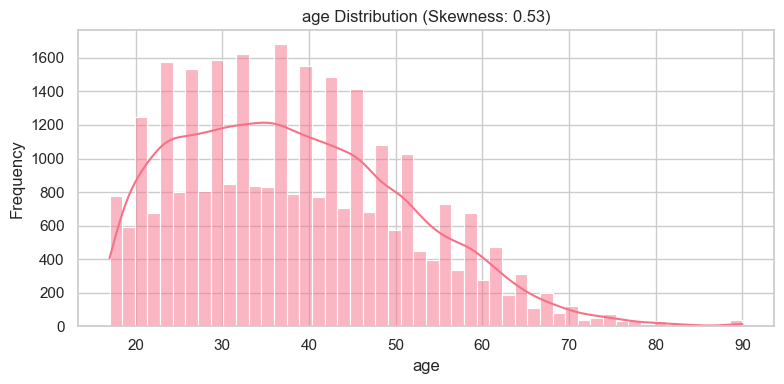

📈 fnlwgt - Skewness: 1.46


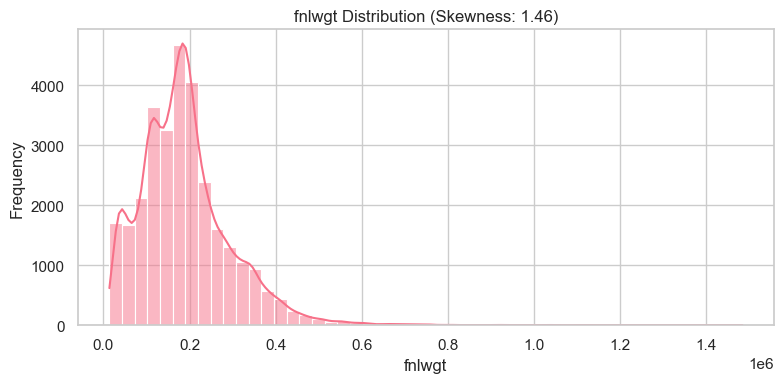

📈 education.num - Skewness: -0.31


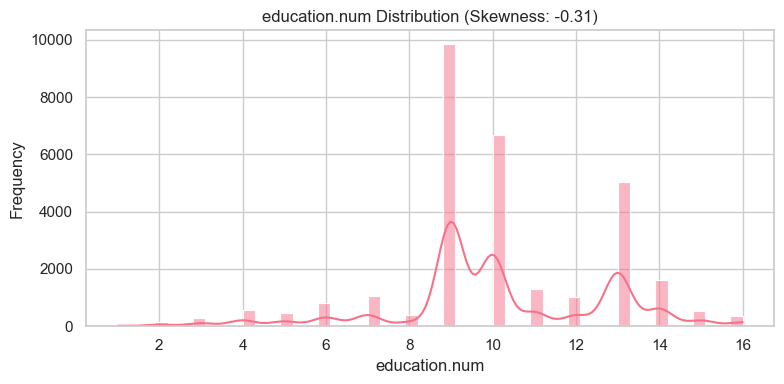

📈 capital.gain - Skewness: 11.90


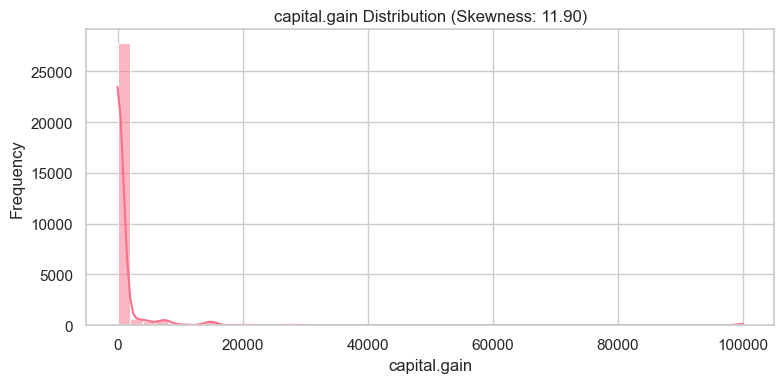

📈 capital.loss - Skewness: 4.53


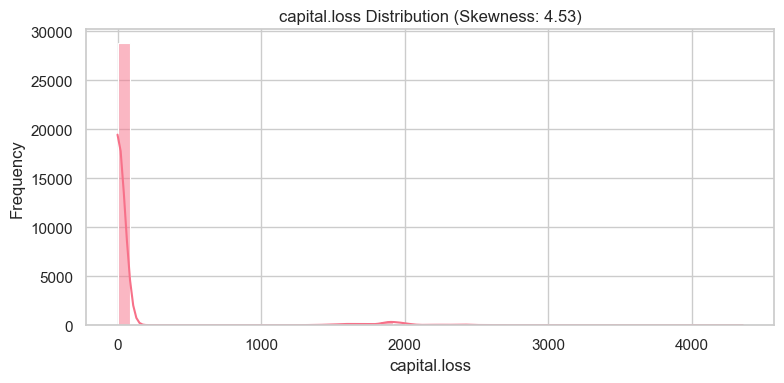

📈 hours.per.week - Skewness: 0.33


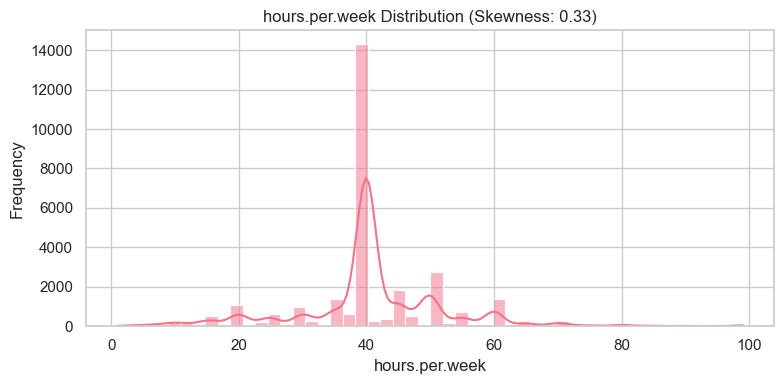

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# Plot histogram + skewness for each numerical column
for col in num_cols:
    skew_val = df_cleaned[col].skew()
    print(f"📈 {col} - Skewness: {skew_val:.2f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], bins=50, kde=True, color=sns.color_palette("husl", 8)[0])
    plt.title(f"{col} Distribution (Skewness: {skew_val:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [45]:
df_cleaned.to_csv("df_cleaned.csv", index=False)